B-spline Basis Matrix:
[[0.2604 0.0208 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [0.4688 0.4792 0.0208 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [0.0208 0.4792 0.4792 0.0208 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [0.0000 0.0208 0.4792 0.4792 0.0208 0.0000 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [0.0000 0.0000 0.0208 0.4792 0.4792 0.0208 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [0.0000 0.0000 0.0000 0.0208 0.4792 0.4792 0.0208 0.0000 0.0000 0.0000
  0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0208 0.4792 0.4792 0.0208 0.0000 0.0000
  0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0208 0.4792 0.4792 0.0208 0.0000
  0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0208 0.4792 0.4792 0.0208
  0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0208 0.4792 0.4792
  0.0208]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0208 0.4792
  0.4792]]
Coefficients:
[ 0.15044496 -0.0344082   0.22990625  0.15309979  0.82526923

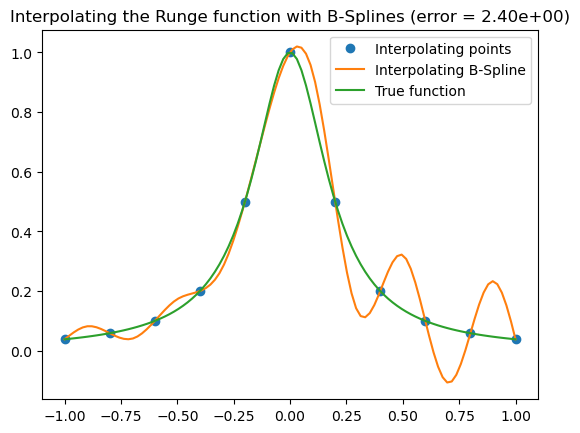

In [ ]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.linalg import solve
import matplotlib.pyplot as plt


def runge(x: float) -> float:
    return 1 / (1 + 25 * x**2)


"""
Evaluate a B-spline basis function over the knots t at a point x
"""
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i + 1] else 0.0
    if t[i + k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i]) / (t[i + k] - t[i]) * B(x, k - 1, i, t)
    if t[i + k + 1] == t[i + 1]:
        c2 = 0.0
    else:
        c2 = (t[i + k + 1] - x) / (t[i + k + 1] - t[i + 1]) * B(x, k - 1, i + 1, t)
    return c1 + c2

# Degree of the B-spline
k = 3
# Knots
ts = [-0.1 + 0.2 * k for k in range(-5, 9, 1)]
# Pad the knots with the same initial and final values
ts = [ts[0]] * (k-2) + ts + [ts[-1]] * (k-2)
# Interpolating points
xs = [-1 + 0.2 * k for k in range(11)]
ys = [runge(x) for x in xs]

# Number of basis functions
n_basis = len(xs)

# Initialize the matrix
# Initialize the B-spline basis matrix
B_matrix = np.zeros((n_basis, n_basis))

# Compute the matrix
for i, x in enumerate(xs):
    for j in range(n_basis):
        B_matrix[i, j] = B(x, k, j, ts)

# Display the B-spline basis matrix in a readable format
print("B-spline Basis Matrix:")
print(np.array2string(B_matrix, formatter={'float_kind': lambda x: f"{x:6.4f}"}))

c = solve(B_matrix, ys)

def bspline(x, t, c, k):
   n = len(c)
   #assert (n >= k+1) and (len(c) >= n)
   return sum(c[i] * B(x, k, i, t) for i in range(n))
# Print the resulting coefficients
print("Coefficients:")
print(c)

# Calculate error
xbars = np.linspace(-1, 1, 41)
ybars = [bspline(x, ts, c, k) for x in xbars]
ytrue = [runge(x) for x in xbars]
error = np.sum(np.abs(np.array(ybars) - np.array(ytrue)))
# Plotting
x_plot = np.linspace(min(xs), max(xs), 100)
y_plot = [bspline(x, ts, c, k) for x in x_plot]
plt.plot(xs, ys, "o", label="Interpolating points")
plt.plot(x_plot, y_plot, label="Interpolating B-Spline")
plt.plot(x_plot, [runge(x) for x in x_plot], label="True function")
plt.legend(loc="best")
plt.title(f"Interpolating the Runge function with B-Splines (error = {error:.2e})")

print(error)

range(2, 21)


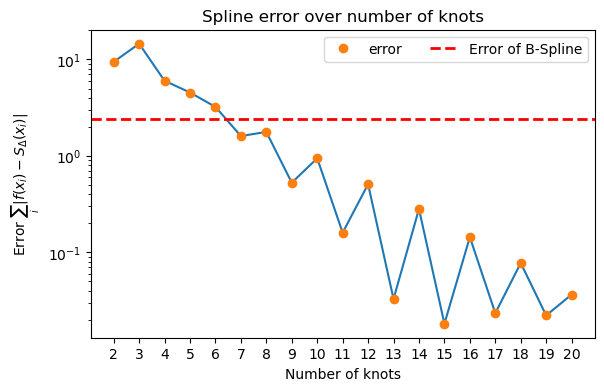

n=2: 9.44812849972556
n=3: 14.578313807966747
n=4: 6.0146641349174175
n=5: 4.542943075714791
n=6: 3.223866268318519
n=7: 1.6050704629223738
n=8: 1.7715561859772926
n=9: 0.5261660068639532
n=10: 0.9443828548168898
n=11: 0.15950340156974002
n=12: 0.5080658718965724
n=13: 0.03270005670481878
n=14: 0.28084279548824936
n=15: 0.01811222321523276
n=16: 0.1434188405571975
n=17: 0.023302334211891707
n=18: 0.07721248234164346
n=19: 0.022064699698631653
n=20: 0.03636788952085353


In [15]:

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def runge(x: float) -> float:
    return 1 / (1 + 25 * x**2)

errors = [] 
steps = range(2,21)
for n in steps:
    #First fit the points
    x = np.linspace(-1,1, n)
    y = runge(x)
    cs = CubicSpline(x, y,bc_type=((2, 0.0), (2, 0.0)))
    #Then calculate the error
    xs = np.linspace(-1, 1, 41)
    ybars= cs(xs)
    error = np.sum(np.abs(ybars - runge(xs)))
    errors.append(error)

print(steps)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(steps, errors)
ax.plot(steps, errors, 'o', label='error')

ax.set_title('Spline error over number of knots')
ax.axhline(2.4,linestyle='--', color='red', lw=2, label='Error of B-Spline')
ax.set_xlabel('Number of knots')
ax.set_ylabel(r'Error $\sum_i|f(x_i) - S_\Delta(x_i)|$')

ax.set_yscale('log')
ax.set_xticks(steps)    
ax.legend(loc='best', ncol=2)

plt.show()

for i,e in enumerate(errors):
    print(f"n={steps[i]}: {e}")